# 2 Audio EDA

In [1]:
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

## 2B. Audio EDA

With the audio files ready, I can explore the audio features.

In general, all of the audio files provided by IMDA have a sample-rate of 16,000 Hz. Librosa library automatically changes everything to a sampling rate of 22,050 Hz. Hence, we will stick to the default Librosa Sampling Rate as the entire API is designed and built upon that sampling rate. Although the higher the sampling rate, the higher the definition of detail, it does not really matter for our case here since we are dealing with human voices/speeches. Furthermore, they are all recorded in a controlled environment. A higher default sampling rate should not affect our modelling and preprocessing too much.

In [2]:
features_df = pd.read_csv("datasets/featuresdf.csv")

In [3]:
features_df.head()

,id,filepath,duration,class_label
0,1400066,./assets/audio_train/1400066_apples.wav,0.759320,apples
1,1400062,./assets/audio_train/1400062_flowers.wav,0.777324,flowers
2,1400049,./assets/audio_train/1400049_worker.wav,0.517324,worker
3,1400051,./assets/audio_train/1400051_water.wav,0.480091,water
4,1400049,./assets/audio_train/1400049_father.wav,0.448073,father


In [4]:
features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 553 entries, 0 to 552
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           553 non-null    int64  
 1   filepath     553 non-null    object 
 2   duration     553 non-null    float64
 3   class_label  553 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 17.4+ KB


In [5]:
labels = [ "apples", "flowers", "worker", "water", "father"]

Text(0.5, 0, 'Number of Files')

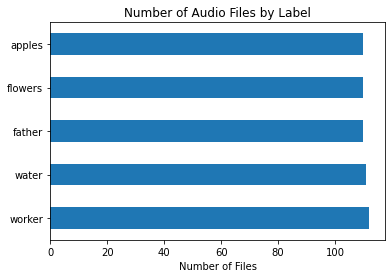

In [6]:
features_df['class_label'].value_counts().plot(kind='barh')
plt.title('Number of Audio Files by Label')
plt.xlabel('Number of Files')

There is almost equal number of audio files per class. This is excellent as it will avoid training the model to be more or less biased towards certain classes.

In [7]:
features_df.groupby('class_label').describe()['duration']

,count,mean,std,min,25%,50%,75%,max
class_label,,,,,,,,
apples,110.0,0.514134,0.099454,0.336689,0.433458,0.501224,0.573243,0.802449
father,110.0,0.417796,0.095219,0.252200,0.352426,0.401066,0.475952,0.694286
flowers,110.0,0.545962,0.108900,0.376644,0.471179,0.527755,0.605510,0.902766
water,111.0,0.441032,0.109743,0.212698,0.362540,0.417188,0.495079,0.842902
worker,112.0,0.490498,0.067764,0.360590,0.441837,0.487120,0.532166,0.660771


The average length of the audio files are quite similar, at about 5 seconds. Even though the words are all of two syllables, the maximum length differs quite a bit, ranging from 6.5 to 9 seconds.

Text(0.5, 0, 'label')

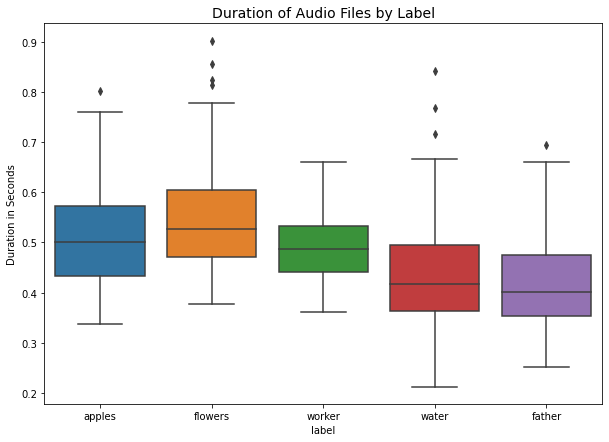

In [8]:
plt.figure(figsize=(10,7))
sns.boxplot(x= 'class_label', y ='duration', data=features_df)
plt.title('Duration of Audio Files by Label', size=14)
plt.ylabel('Duration in Seconds')
plt.xlabel('label')

There are a few outliers among them. Let's examine them.

### Examining the Outliers

**Apples**

In [9]:
features_df[features_df['class_label'] == 'apples']['duration'].sort_values(ascending=False)[:3]

15     0.802449
0      0.759320
503    0.738594
Name: duration, dtype: float64

In [10]:
fp = features_df.loc[15]['filepath']
ipd.Audio(fp)

It sounds like this is not an outlier. The speaker happen to speak much slower than most of the other speakers. This audio clip will be kept.

**Flowers**

There are 4 outliers, let's listen to each one of them.


In [11]:
features_df[features_df['class_label'] == 'flowers']['duration'].sort_values(ascending=False)[:4]

509    0.902766
137    0.856508
11     0.824127
96     0.813968
Name: duration, dtype: float64

In [12]:
fp = features_df.loc[509]['filepath']
ipd.Audio(fp)

In [13]:
fp = features_df.loc[137]['filepath']
ipd.Audio(fp)

In [14]:
fp = features_df.loc[11]['filepath']
ipd.Audio(fp)

In [15]:
fp = features_df.loc[96]['filepath']
ipd.Audio(fp)

Similarly, it happens that all 4 speaker spoke quite slowly relative to the rest of the speakers. I will keep these audio clips as well.

**Water**

There are two outliers. Let's listen to them.

In [16]:
features_df[features_df['class_label'] == 'water']['duration'].sort_values(ascending=False)[:2]

415    0.842902
506    0.767846
Name: duration, dtype: float64

In [17]:
fp = features_df.loc[415]['filepath']
ipd.Audio(fp)

In [18]:
fp = features_df.loc[506]['filepath']
ipd.Audio(fp)

Likewise as above, these two speaker spoke slow and also dragged their voice, resulting in a longer sound. These will also be retained.

**Father**

In [19]:
features_df[features_df['class_label'] == 'father']['duration'].sort_values(ascending=False)[:3]

542    0.694286
270    0.661224
507    0.615283
Name: duration, dtype: float64

In [20]:
fp = features_df.loc[542]['filepath']
ipd.Audio(fp)

In [21]:
fp = features_df.loc[270]['filepath']
ipd.Audio(fp)

In [22]:
fp = features_df.loc[507]['filepath']
ipd.Audio(fp)

The speaker also spoke slightly slower, does not seem like an error in processing the audio.

Summary: There are no outliers which would hurt the modelling too much. They should not affect the model's ability to generalise. I will be including all of them in the modelling.

### Examine the Soundwave of Each Label

Let's examine speaker `306`, we can look at the soundwaves and the actual audio clip below.

In [25]:
labels = features_df['class_label'].unique()

In [39]:
# get 5 speakers from each class
# get the file path

five_speakers = []

for l in labels:
    five_speakers.extend(features_df[features_df['class_label'] == l][:5]['filepath'])
    
five_speakers

['./assets/audio_train/1400066_apples.wav',
 './assets/audio_train/1410066_apples.wav',
 './assets/audio_train/1580066_apples.wav',
 './assets/audio_train/1630066_apples.wav',
 './assets/audio_train/1850066_apples.wav',
 './assets/audio_train/1400062_flowers.wav',
 './assets/audio_train/1410062_flowers.wav',
 './assets/audio_train/1580062_flowers.wav',
 './assets/audio_train/1630062_flowers.wav',
 './assets/audio_train/1850062_flowers.wav',
 './assets/audio_train/1400049_worker.wav',
 './assets/audio_train/1410049_worker.wav',
 './assets/audio_train/1580049_worker.wav',
 './assets/audio_train/1630049_worker.wav',
 './assets/audio_train/1850049_worker.wav',
 './assets/audio_train/1400051_water.wav',
 './assets/audio_train/1410051_water.wav',
 './assets/audio_train/1580051_water.wav',
 './assets/audio_train/1630051_water.wav',
 './assets/audio_train/1850051_water.wav',
 './assets/audio_train/1400049_father.wav',
 './assets/audio_train/1410049_father.wav',
 './assets/audio_train/1580049_f

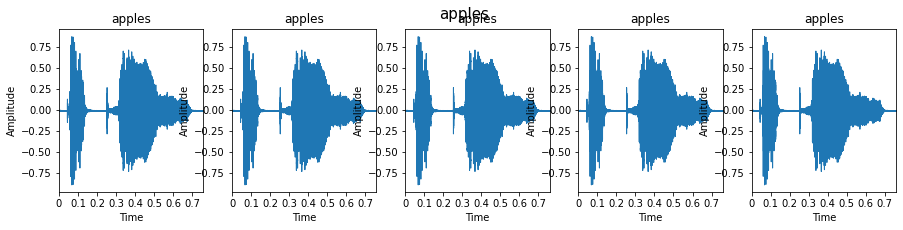

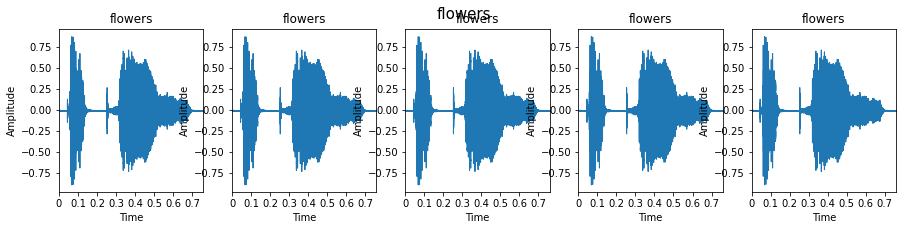

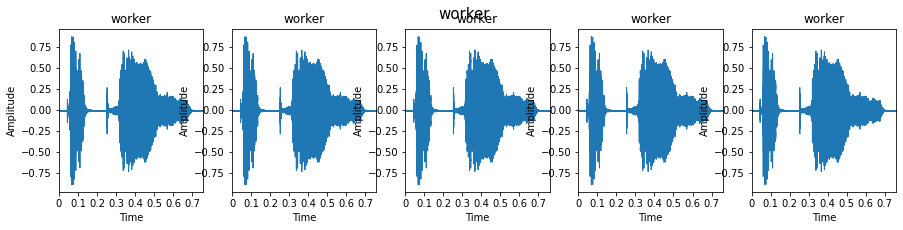

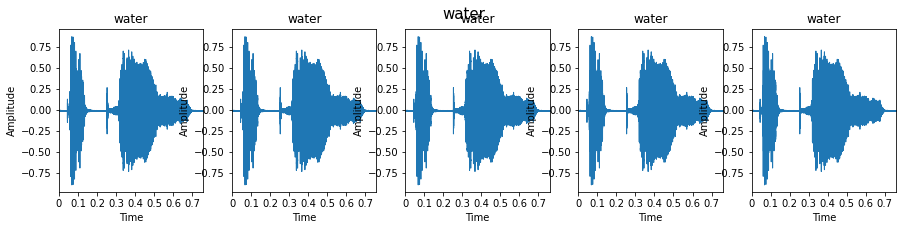

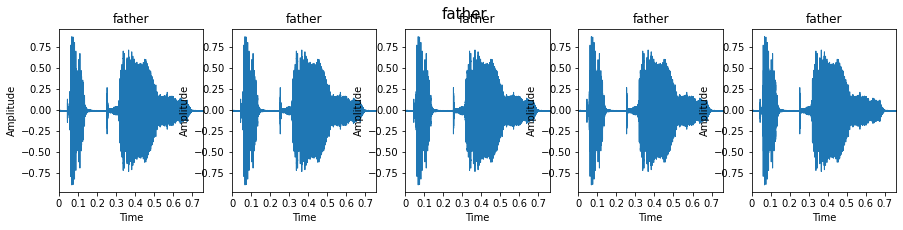

In [43]:
for l in labels:
    fig, ax = plt.subplots(nrows = 1, ncols=5, figsize=(15,3))
    ax = ax.ravel()
    fig.suptitle(l, size=15)
    for n in range(0,5):
        audio, sr = librosa.load(f)
        librosa.display.waveplot(audio, sr=sr, ax=ax[n])
        ax[n].set_title(l)
        ax[n].set_ylabel('Amplitude')
    

<>:8: SyntaxWarning: 'int' object is not subscriptable; perhaps you missed a comma?
<>:8: SyntaxWarning: 'int' object is not subscriptable; perhaps you missed a comma?
<ipython-input-37-062c1c68e7c9>:8: SyntaxWarning: 'int' object is not subscriptable; perhaps you missed a comma?
  ax[n].set_title(labels*5[n])


TypeError: 'int' object is not subscriptable

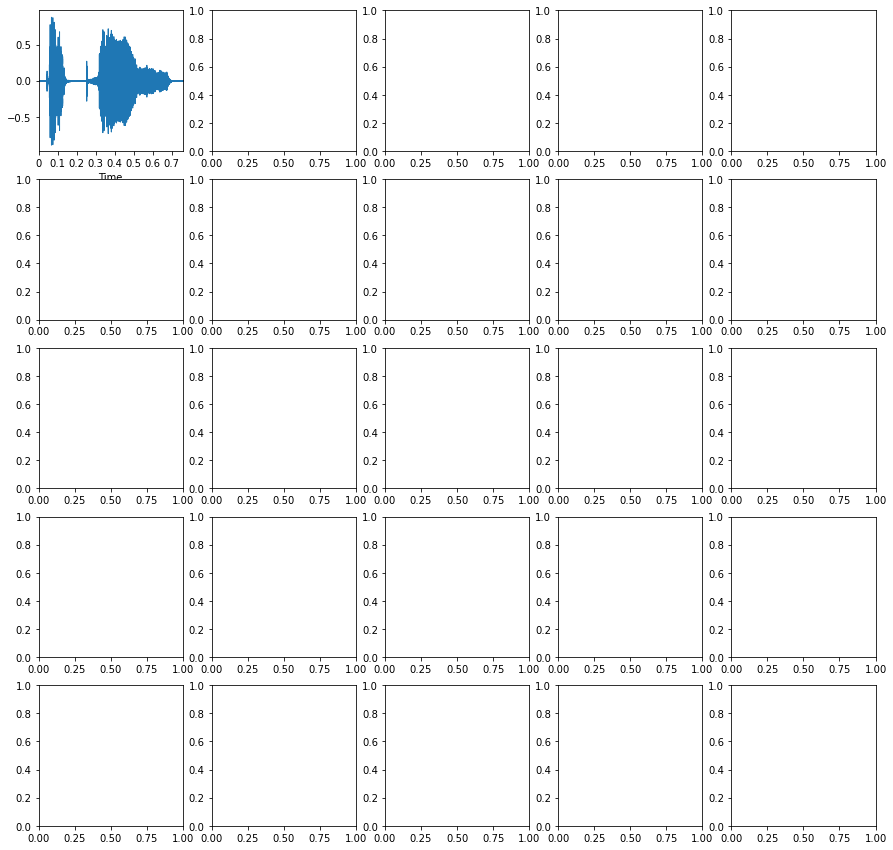

In [37]:
# plot all in subplots

for l in labels:
    fig, ax = plt.subplots(nrows = 1, ncols=5, figsize=(3,15))
    ax = ax.ravel()

for n, f in enumerate(five_speakers):
    audio, sr = librosa.load(f)
    librosa.display.waveplot(audio, sr=sr, ax=ax[n])
    ax[n].set_title()
    ax[n].set_ylabel('Amplitude')

fig.tight_layout(pad=3.5)
fig.suptitle(l, size=15)

The sound wave for `father` and `flowers` have similar beginning while the words `water`, `apples`, and `worker` have distinct breaks between them. 

In [23]:
for n, f in enumerate(plot_list):
    audio, sr = librosa.load(f)
    print(labels[n])
    ipd.display(ipd.Audio(f))

apples


flowers


worker


water


father


These words do not have a consistent intonation because they are extracted out of a sentence which they are narrating. 

**Examine Mel-Frequency Cepstral Coefficients (MFCC)**

MFCCs are commonly used to distinguish the features between audios.

Text(0.5, 0.98, 'MFCCs of Each Word by Speaker 306')

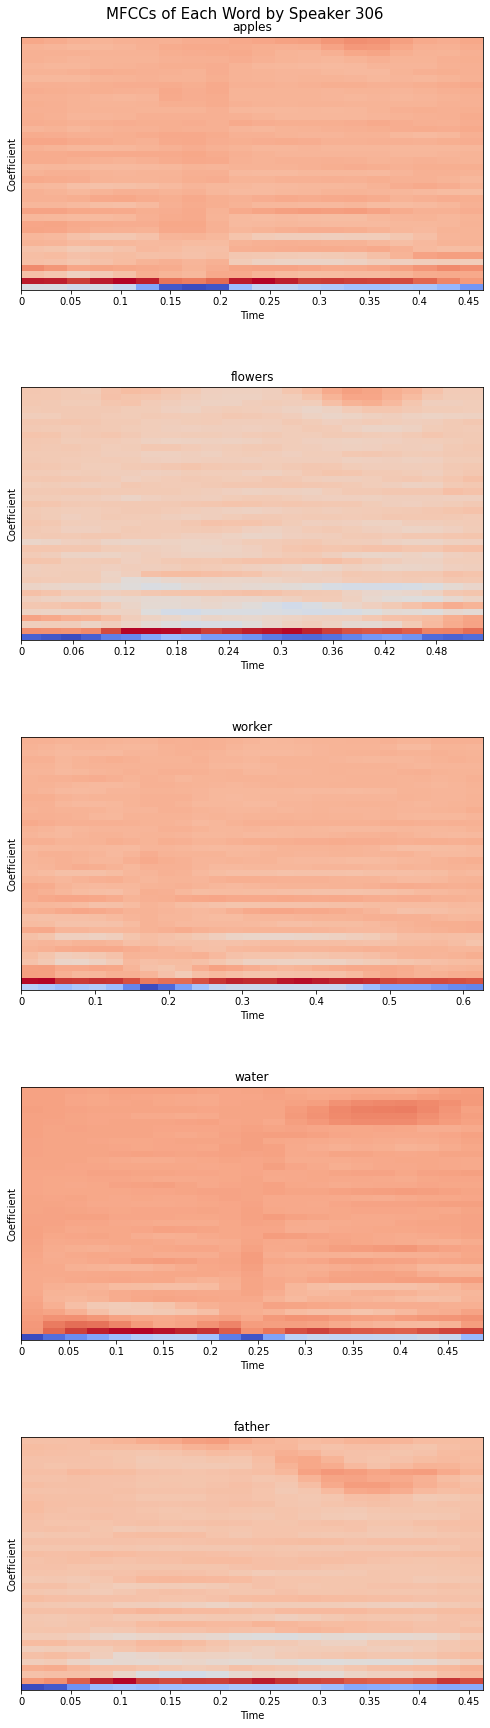

In [32]:
# plot all in subplots
fig, ax = plt.subplots(nrows = 5, ncols=1, figsize=(8,25))

for n, f in enumerate(plot_list):
    audio, sr = librosa.load(f)
    mfcc = librosa.feature.mfcc(audio, sr = sr, n_mfcc=40)
    librosa.display.specshow(mfcc,ax=ax[n],x_axis = 'time')
    ax[n].set_title(labels[n])
    ax[n].set_ylabel('Coefficient')

fig.tight_layout(pad=5)
fig.suptitle('MFCCs of Each Word by Speaker 306', size=15)

In [38]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# plot all in subplots
fig, ax = plt.subplots(nrows = 5, ncols=1, figsize=(8,25))

for n, f in enumerate(plot_list):
    audio, sr = librosa.load(f)
    mfcc = librosa.feature.mfcc(audio, sr = sr, n_mfcc=40)
    ss = StandardScaler()
    mfcc_ss = ss.fit_transform(mfcc)
    librosa.display.specshow(mfcc_ss,ax=ax[n],x_axis = 'time')
    ax[n].set_title(labels[n])
    ax[n].set_ylabel('Coefficient')

fig.tight_layout(pad=5)
fig.suptitle('MFCCs of Each Word by Speaker 306', size=15)

C:\Users\andyc\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\andyc\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:191: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\andyc\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\andyc\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:191: UserWarning: Numer

Text(0.5, 0.98, 'MFCCs of Each Word by Speaker 306')

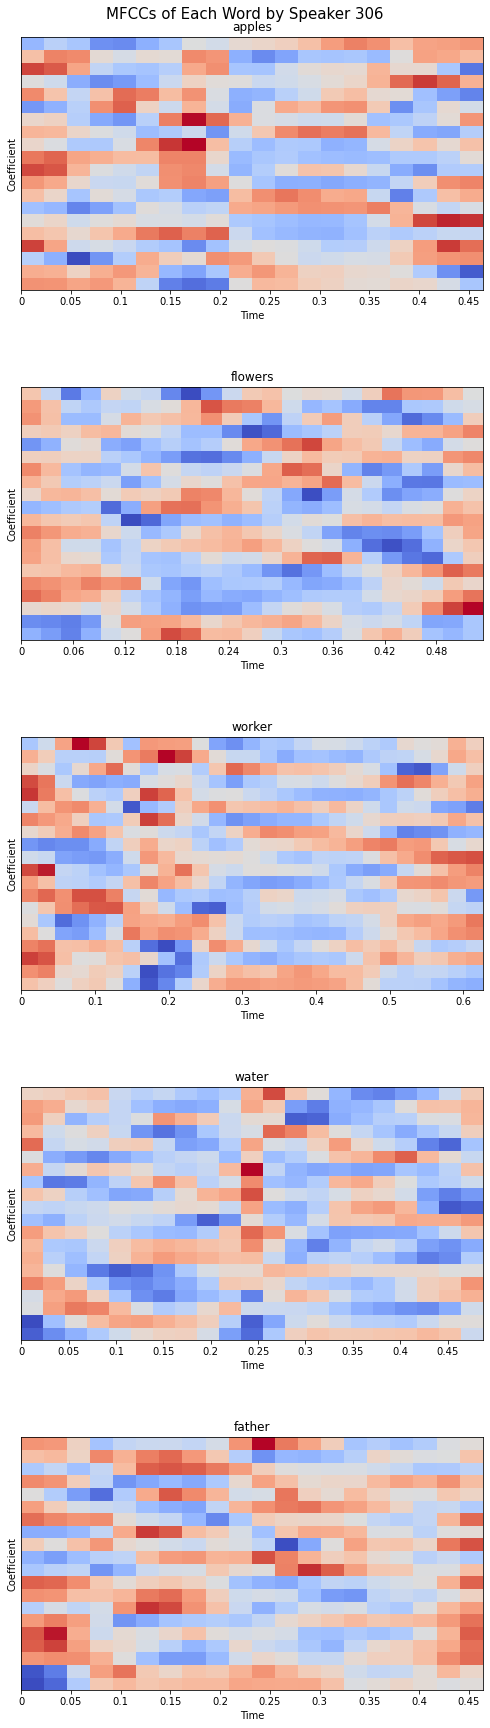

In [41]:
# plot all in subplots
fig, ax = plt.subplots(nrows = 5, ncols=1, figsize=(8,25))

for n, f in enumerate(plot_list):
    audio, sr = librosa.load(f)
    mfcc = librosa.feature.mfcc(audio, sr = sr, n_mfcc=20)
    mfcc = scale(mfcc, axis=1)
    librosa.display.specshow(mfcc,ax=ax[n],x_axis = 'time')
    ax[n].set_title(labels[n])
    ax[n].set_ylabel('Coefficient')

fig.tight_layout(pad=5)
fig.suptitle('MFCCs of Each Word by Speaker 306', size=15)

Text(0.5, 0.98, 'MFCCs of Each Word by Speaker 306')

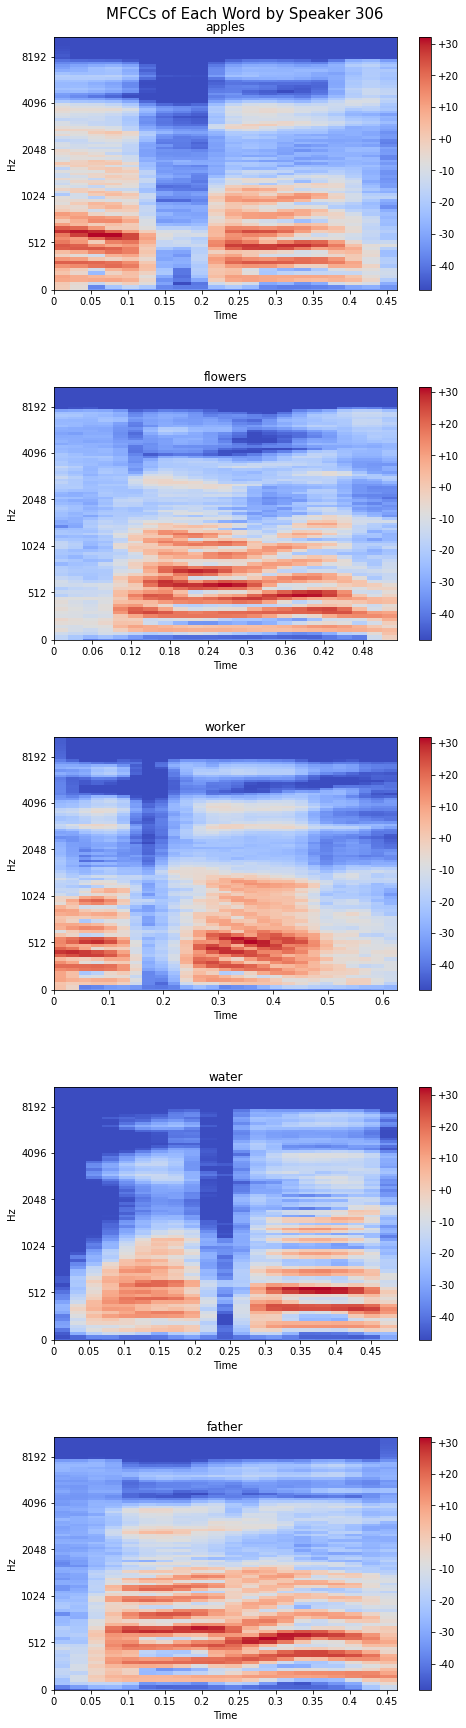

In [46]:
# plot all in subplots
fig, ax = plt.subplots(nrows = 5, ncols=1, figsize=(8,25))

for n, f in enumerate(plot_list):
    audio, sr = librosa.load(f)
    mel_spectrogram = librosa.feature.melspectrogram(audio, sr = sr, n_mels=90)
    log_mel_spectrogram = librosa.power_to_db(mel_spectrogram)
    mel_show = librosa.display.specshow(log_mel_spectrogram,sr = sr, ax=ax[n],x_axis = 'time', y_axis = 'mel')
    ax[n].set_title(labels[n])
    fig.colorbar(mel_show, format='%+2.f', ax=ax[n])

fig.tight_layout(pad=5)
fig.suptitle('MFCCs of Each Word by Speaker 306', size=15)

In [26]:
audio, sr = librosa.load("./assets/audio_train/10210066_apples.wav")

In [29]:
mel_spectrogram = librosa.feature.melspectrogram(audio, sr=sr, n_mels=90)

In [30]:
mel_spectrogram.shape

(90, 23)

In [31]:
log_mel_spectrogram = librosa.power_to_db(mel_spectrogram)

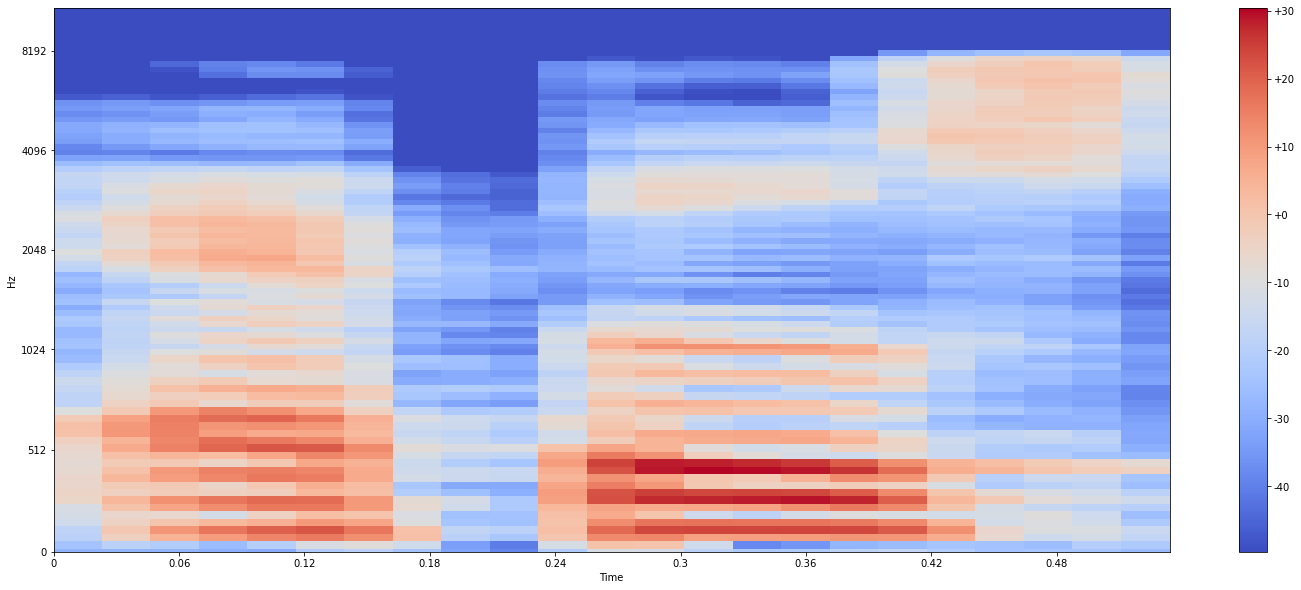

In [34]:
plt.figure(figsize=(25,10))
librosa.display.specshow(log_mel_spectrogram,
                        x_axis='time',
                        y_axis='mel',
                        sr=sr)
plt.colorbar(format='%+2.f')

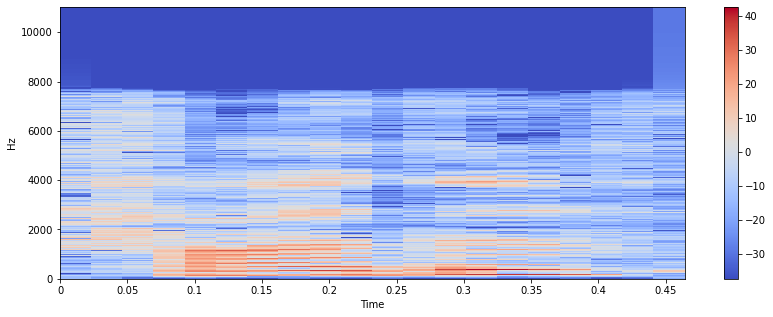

In [175]:
X = librosa.stft(audio)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

D:\Anaconda\envs\Capstone\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
D:\Anaconda\envs\Capstone\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
D:\Anaconda\envs\Capstone\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'linscaley' parameter of __init__() has been renamed 'linscale' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


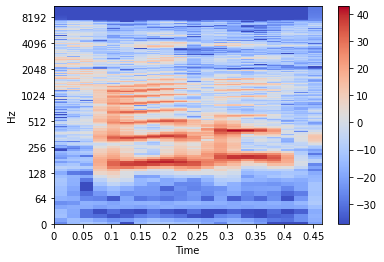

In [176]:
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

In [9]:
filepath = f'./assets/audio_train/1400049_father.wav'
audio, sr = librosa.load(filepath)
mfccs = librosa.feature.mfcc(y = audio, sr=sr, n_mfcc=40)

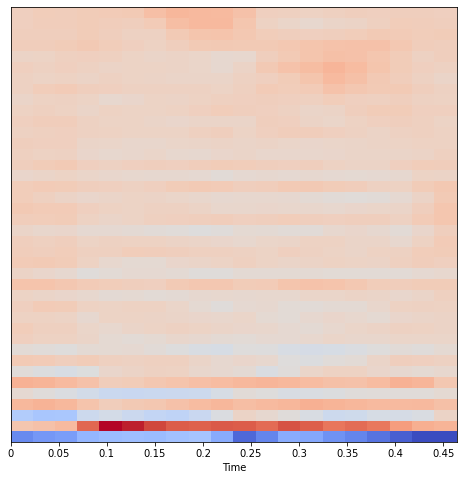

In [10]:
plt.figure(figsize=(8,8))
librosa.display.specshow(mfccs, sr=sr, x_axis = 'time')

In [11]:
mfccs.shape

(40, 20)

In [12]:
mfccs

array([[-1.96346878e+02, -1.79968414e+02, -1.73948914e+02,
        -1.40422562e+02, -1.30837280e+02, -1.27352371e+02,
        -1.30908127e+02, -1.21989059e+02, -1.16357872e+02,
        -1.56346008e+02, -2.33684799e+02, -2.01312592e+02,
        -1.54644608e+02, -1.60986404e+02, -1.86442413e+02,
        -2.01413818e+02, -2.20349533e+02, -2.41758011e+02,
        -2.62189514e+02, -2.62184204e+02],
       [ 1.77322083e+01,  2.43227654e+01,  3.50402985e+01,
         1.25764130e+02,  1.88848480e+02,  1.77813965e+02,
         1.53549866e+02,  1.35759369e+02,  1.32387604e+02,
         1.36715790e+02,  1.34408569e+02,  1.23432152e+02,
         1.43213623e+02,  1.33257278e+02,  1.11394722e+02,
         1.21203140e+02,  1.09763245e+02,  7.17845459e+01,
         5.06944618e+01,  4.38083000e+01],
       [-1.01654694e+02, -1.13328751e+02, -1.11931900e+02,
        -6.33613739e+01, -5.28529968e+01, -6.58507996e+01,
        -7.88319702e+01, -8.26968231e+01, -6.97221756e+01,
        -4.02028198e+01, -9.9

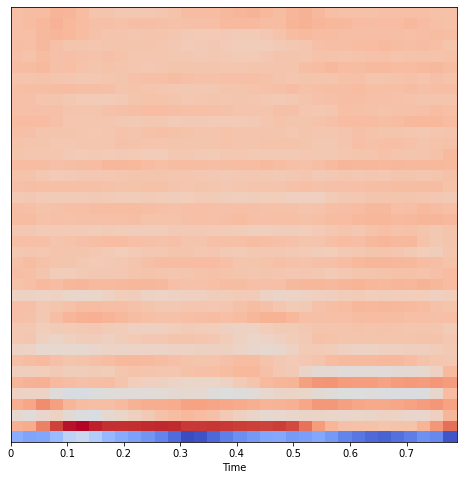

In [13]:
filepath = f'./assets/audio_train/1400062_flowers.wav'
audio, sr = librosa.load(filepath)
mfccs = librosa.feature.mfcc(y = audio, sr=sr, n_mfcc=40)
plt.figure(figsize=(8,8))
librosa.display.specshow(mfccs, sr=sr, x_axis = 'time')

In [9]:
mfccs.shape

(40, 34)

EDA should follow 